# RFM 분석 및 고객 세그멘테이션

In [57]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import platform
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system. sorry.')


customer = pd.read_csv("./olist_customers_dataset.csv")
orders = pd.read_csv('./olist_orders_dataset.csv')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv')
order_items = pd.read_csv('./olist_order_items_dataset.csv')

## 데이터 확인

In [2]:
# orders[orders['order_id'].duplicated()]
orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
61990,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00


In [3]:
order_payments[order_payments['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
91871,fffb9224b6fc7c43ebb0904318b10b5f,1,boleto,1,356.76


In [4]:
order_items[order_items['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']
# order_items2 = order_items[['order_id', 'price','freight_value']].groupby('order_id').sum()
# order_items2
# order_items = order_items.reset_index()
# order_items2 = order_items2.reset_index()
# order_items2
# order_items[['price','freight_value']] = order_items2
# order_items
# order_items = order_items.drop_duplicates(['order_id'])
# order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


In [5]:
test = pd.merge(orders, customer, on='customer_id')
test = test.merge(order_items, on = 'order_id')
test = test.merge(order_payments, on = 'order_id')
test

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1,credit_card,3,195.00
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1,credit_card,5,271.01
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1,credit_card,4,441.16
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1,credit_card,4,441.16


In [6]:
test[test['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
73131,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73132,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73133,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73134,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer[customer['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


같은 사람이 (customer_unique_id) 각각 다른 customer_id를 가진다. 즉 3345명은 같은 사람

In [9]:
customer[customer['customer_unique_id'] == 'b6c083700ca8c135ba9f0f132930d4e8']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
132,f7c5afab273b47ab517e096e0219b932,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


In [10]:
test[test['customer_id'] == 'c57b4b6f3719475543b721e720a526ad']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
80924,3c8194a8d47f5852dcd52ccbf364596e,c57b4b6f3719475543b721e720a526ad,delivered,2017-11-27 12:44:25,2017-11-27 12:56:18,2017-11-30 19:25:50,2017-12-01 17:05:02,2017-12-11 00:00:00,b6c083700ca8c135ba9f0f132930d4e8,8686,...,1,5ad486e80218c20810521ec57ae5475e,994f04b3718c2bab35c2adfa8afecd2a,2017-12-01 12:56:18,49.9,9.34,1,credit_card,1,59.24


In [11]:
test[test['customer_id'] == 'f7c5afab273b47ab517e096e0219b932']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
64378,0be5691eb4c245d190a1e194494f754d,f7c5afab273b47ab517e096e0219b932,delivered,2017-09-05 15:32:33,2017-09-05 15:50:35,2017-09-06 19:37:44,2017-09-11 22:19:57,2017-09-28 00:00:00,b6c083700ca8c135ba9f0f132930d4e8,8686,...,1,f4b952dd7ab601c02bb1bd06395f45f6,86ccac0b835037332a596a33b6949ee1,2017-09-12 15:50:35,79.9,17.81,1,credit_card,1,97.71


In [12]:
test[test['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
73131,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73132,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73133,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76
73134,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,...,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,1,boleto,1,356.76


- 같은 사람이 같은 상품을 다량 주문 할 때는 order_id와 customer_id를 포함하여 모두 같지만
- 같은 사람이 다른 상품을 주문 할 때는 order_id와 customer_id가 다르다

## RFM 구하기

### 데이터 준비

In [13]:
df = pd.merge(orders, customer, on='customer_id')
df = df.merge(order_payments, on = 'order_id')
df = df[~((df['order_status'] == 'unavailable') | (df['order_status'] == 'canceled'))]
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102573 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102573 non-null  object        
 1   customer_id                    102573 non-null  object        
 2   order_status                   102573 non-null  object        
 3   order_purchase_timestamp       102573 non-null  datetime64[ns]
 4   order_approved_at              102554 non-null  object        
 5   order_delivered_carrier_date   101920 non-null  object        
 6   order_delivered_customer_date  100748 non-null  object        
 7   order_estimated_delivery_date  102573 non-null  object        
 8   customer_unique_id             102573 non-null  object        
 9   customer_zip_code_prefix       102573 non-null  int64         
 10  customer_city                  102573 non-null  object        
 11  custo

### Recency 계산

In [14]:
recency_df= pd.DataFrame(df.groupby(by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [15]:
today = recency_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
today

Timestamp('2018-09-05 09:06:57')

In [16]:
recency_df['Recency'] = today - recency_df['order_purchase_timestamp']
recency_df['Recency'] = recency_df['Recency'].dt.days
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,120
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,543
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,327
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,294
...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,453
94985,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,268
94986,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,574
94987,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,125


In [17]:
recency_df['Recency'].describe()

count    94989.000000
mean       244.443378
std        152.993004
min          2.000000
25%        120.000000
50%        225.000000
75%        353.000000
max        730.000000
Name: Recency, dtype: float64

In [18]:
recency_df[recency_df['Recency'] == 2]
# Timestamp('2018-09-05 09:06:57')

,customer_unique_id,order_purchase_timestamp,Recency
94654,ff22e30958c13ffe219db7d711e8f564,2018-09-03 09:06:57,2


### Frequency 계산

In [19]:
frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,1
94985,fffea47cd6d3cc0a88bd621562a9d061,1
94986,ffff371b4d645b6ecea244b27531430a,1
94987,ffff5962728ec6157033ef9805bacc48,1


In [20]:
frequency_df['Frequency'].describe()

count    94989.000000
mean         1.033867
std          0.210828
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: Frequency, dtype: float64

In [21]:
frequency_df['Frequency'].value_counts()

Frequency
1     92101
2      2652
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: count, dtype: int64

### Monetary 계산

In [22]:
monetary_df = df[['customer_unique_id', 'payment_value']].groupby('customer_unique_id').sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
94985,fffea47cd6d3cc0a88bd621562a9d061,84.58
94986,ffff371b4d645b6ecea244b27531430a,112.46
94987,ffff5962728ec6157033ef9805bacc48,133.69


In [23]:
monetary_df['Monetary'].describe()

count    94989.000000
mean       165.694312
std        226.740844
min          9.590000
25%         63.100000
50%        107.900000
75%        182.940000
max      13664.080000
Name: Monetary, dtype: float64

In [24]:
Monetary_score = pd.qcut(monetary_df['Monetary'].values, 5)
Monetary_score.describe()

,counts,freqs
categories,,
"(9.589, 55.36]",19001,0.200034
"(55.36, 87.51]",18998,0.200002
"(87.51, 133.058]",18994,0.199960
"(133.058, 209.12]",19000,0.200023
"(209.12, 13664.08]",18996,0.199981


## RFM 도출 후 분포 확인

In [25]:
result_df = pd.merge(recency_df, frequency_df, on = 'customer_unique_id')
result_df = result_df.merge(monetary_df, on = 'customer_unique_id')
result_df = result_df.drop(['order_purchase_timestamp'], axis=1)
result_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
2,0000f46a3911fa3c0805444483337064,543,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89
...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,453,1,2067.42
94985,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58
94986,ffff371b4d645b6ecea244b27531430a,574,1,112.46
94987,ffff5962728ec6157033ef9805bacc48,125,1,133.69


In [26]:
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,94989.0,244.443378,152.993004,2.00,120.0,225.0,353.00,730.00
Frequency,94989.0,1.033867,0.210828,1.00,1.0,1.0,1.00,16.00
Monetary,94989.0,165.694312,226.740844,9.59,63.1,107.9,182.94,13664.08


### 분포 시각화

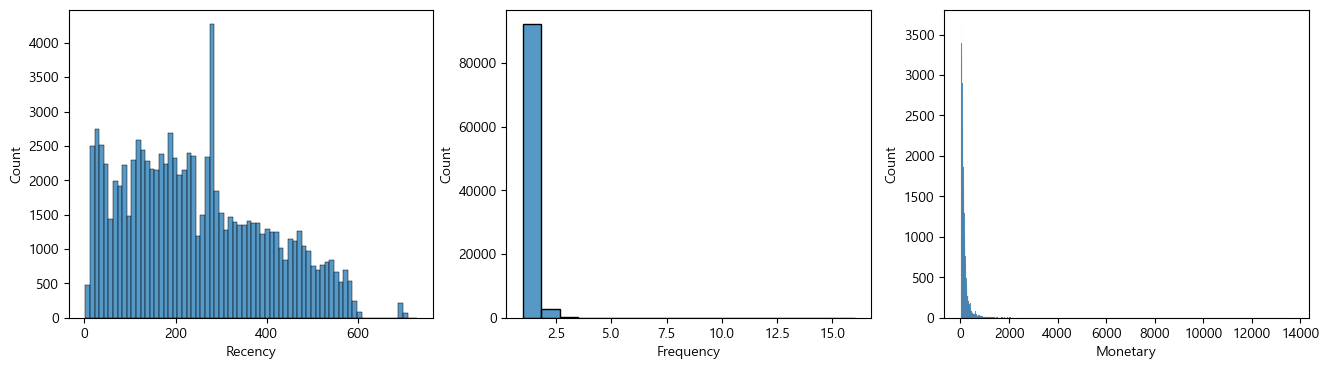

In [27]:
# rfm 시각화 확인하기
fig, ax = plt.subplots(1, 3, figsize=(16,4))

ax = ax.flatten()

for col, ax in zip(['Recency', 'Frequency', 'Monetary'], ax):
    sns.histplot(result_df[col], ax = ax) 
plt.show()

F, M의 데이터가 한쪽으로 치우쳐져 있는 것을 확인할 수 있다.

In [28]:
# from plotly import graph_objects as go

# order_1 = len(result_df[result_df['Frequency'] == 1])
# order_2 = len(result_df[result_df['Frequency'] == 2])
# order_3 = len(result_df[result_df['Frequency'] >= 3])

# fig = go.Figure(go.Funnel(
#     y =["1회 구매", "2회 구매", "3회 이상 구매"],
#     x = [order_1,order_2,order_3],
#     textinfo = "value",
#     opacity = 0.65, marker = {"color": ["silver", "gold", "red", 'red'],
                              
#     }
#     ))
# fig.update_layout(
#     title=dict(
#         # <br> 태크와 <sup>태그 사용해서 서브 타이틀을 작성할 수 있음
#         text='구매횟수별 소비자수',
#         font=dict(
#             family="Arial",
#             size=25,
#             color="#000000")))
# fig.show()

## RFM 점수화
- Recency, Recency의 점수를 1 ~ 5의 범위로 비율 나누기
- Frequency는 1이 모든 비중을 차지하고 있어 1 ~ 3의 범위로 비율 나누기

In [29]:
result_df['R_score'] = pd.qcut(result_df['Recency'], 5, labels = [5, 4, 3, 2, 1]).astype(str)

result_df['F_score'] = result_df['Frequency'].apply(lambda x: '1' if x == 1 else ('2' if x == 2 else '3'))

result_df['M_score'] = pd.qcut(result_df['Monetary'], 5, labels = [1, 2, 3, 4, 5]).astype(str)
result_df

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,543,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2,1,4
...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,453,1,2067.42,1,1,5
94985,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58,3,1,2
94986,ffff371b4d645b6ecea244b27531430a,574,1,112.46,1,1,3
94987,ffff5962728ec6157033ef9805bacc48,125,1,133.69,4,1,4


In [30]:
print(result_df['R_score'].value_counts(normalize=True).sort_index(), '\n\n',
        result_df['F_score'].value_counts(normalize=True).sort_index(),'\n\n',
        result_df['M_score'].value_counts(normalize=True).sort_index()
       )

R_score
1    0.199802
2    0.199370
3    0.200171
4    0.199360
5    0.201297
Name: proportion, dtype: float64 

 F_score
1    0.969596
2    0.027919
3    0.002484
Name: proportion, dtype: float64 

 M_score
1    0.200034
2    0.200002
3    0.199960
4    0.200023
5    0.199981
Name: proportion, dtype: float64


In [31]:
# !pip install yellowbrick

## RFM 점수별 고객 클러스터링

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

### MinMaxScaler로 R, F, M 정규화

In [33]:
mms = MinMaxScaler()
 
rfm_data = result_df[['Recency', 'Frequency', 'Monetary']]

rfm_data_scaled = mms.fit_transform(rfm_data)
rfm_data_scaled = pd.DataFrame(rfm_data_scaled, columns=['Recency', 'Frequency', 'Monetary'])    
rfm_data_scaled.head()

,Recency,Frequency,Monetary
0,0.157967,0.0,0.009690
1,0.162088,0.0,0.001289
2,0.743132,0.0,0.005612
3,0.446429,0.0,0.002492
4,0.401099,0.0,0.013717


### 최적의 K값 탐색
- 엘보우 방법 (Elbow Method) : 클러스터 수 대비 SSE(Sum of Squared Errors)를 나타내어, SSE 값이 급격히 감소하는 "엘보우(꺾이는 지점)"를 찾는 것을 목표로 한다.
- 실루엣 분석 (Silhouette Analysis) : 클러스터링의 품질을 평가하는 데 사용되며, +1에 가까울수록 좋은 클러스터링을 의미한다.

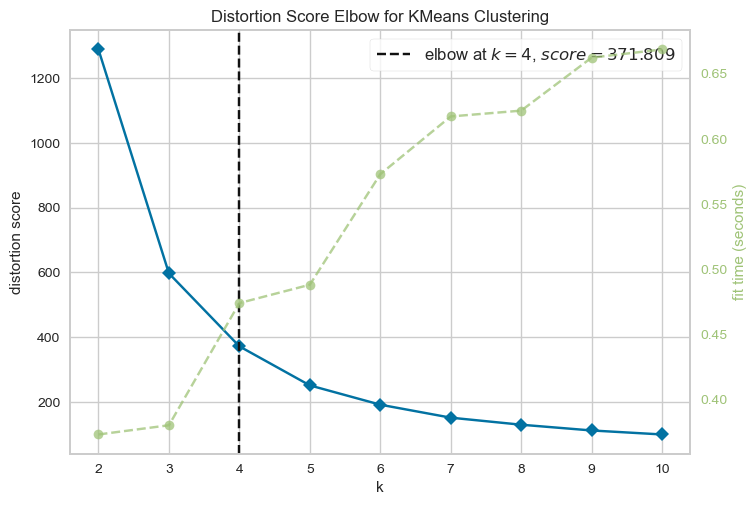

In [34]:
km = KMeans()
elbow = KElbowVisualizer(estimator = km, k = 10)
elbow.fit(rfm_data_scaled)
elbow.show()

plt.show()

In [35]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # 실루엣 분석을 사용하여 최적의 K값 탐색
# silhouette_scores = []
# for k in range(2, 6):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(rfm_data_scaled)
#     score = silhouette_score(rfm_data_scaled, kmeans.labels_)
#     silhouette_scores.append(score)
#     print(score)
# # 실루엣 분석 그래프 그리기
# plt.plot(range(2, 6), silhouette_scores, marker='o')

In [36]:
# from yellowbrick.cluster import SilhouetteVisualizer

# vis=SilhouetteVisualizer(KMeans(n_clusters=4,n_init=10, random_state=0))
# vis.fit(rfm_data_scaled)
# vis.show()

In [37]:
km = KMeans(n_clusters = 4, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled)

rfm_data_scaled['cluster'] = clusters
rfm_data_scaled

,Recency,Frequency,Monetary,cluster
0,0.157967,0.0,0.009690,1
1,0.162088,0.0,0.001289,1
2,0.743132,0.0,0.005612,0
3,0.446429,0.0,0.002492,2
4,0.401099,0.0,0.013717,2
...,...,...,...,...
94984,0.619505,0.0,0.150707,0
94985,0.365385,0.0,0.005492,2
94986,0.785714,0.0,0.007534,0
94987,0.168956,0.0,0.009089,1


In [38]:
result_df['cluster'] = rfm_data_scaled['cluster']
result_df['cluster'].value_counts().sort_index()

cluster
0    16915
1    25836
2    24734
3    27504
Name: count, dtype: int64

In [39]:
cluster_summary = result_df.groupby('cluster')[['Recency','Frequency','Monetary']].mean()
cluster_summary

,Recency,Frequency,Monetary
cluster,,,
0,490.575584,1.025421,164.356140
1,68.384464,1.039170,169.651038
2,320.523692,1.032344,166.355502
3,190.035340,1.035449,162.205922


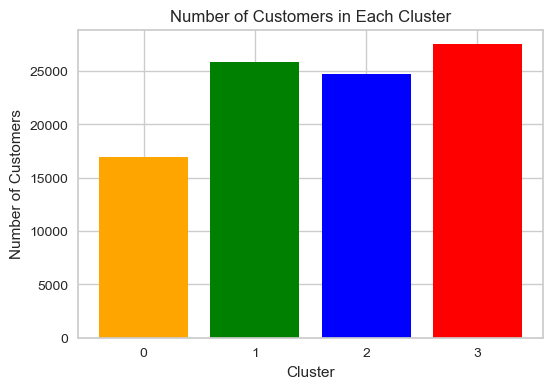

In [40]:
#각 클러스터의 고객 수 시각화
plt.figure(figsize=(6, 4))
plt.bar(result_df['cluster'].value_counts().index, result_df['cluster'].value_counts(), color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.xticks(result_df['cluster'].value_counts().index)
plt.show()

In [41]:
result_df

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,4,1,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,4,1,1,1
2,0000f46a3911fa3c0805444483337064,543,1,86.22,1,1,2,0
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,2,1,1,2
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2,1,4,2
...,...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,453,1,2067.42,1,1,5,0
94985,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58,3,1,2,2
94986,ffff371b4d645b6ecea244b27531430a,574,1,112.46,1,1,3,0
94987,ffff5962728ec6157033ef9805bacc48,125,1,133.69,4,1,4,1


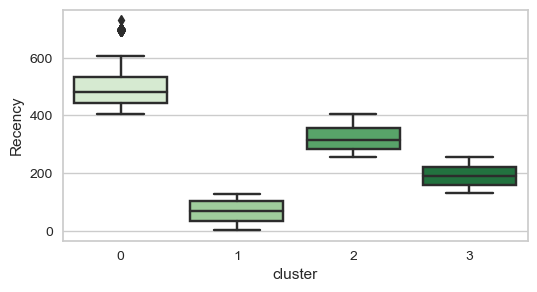

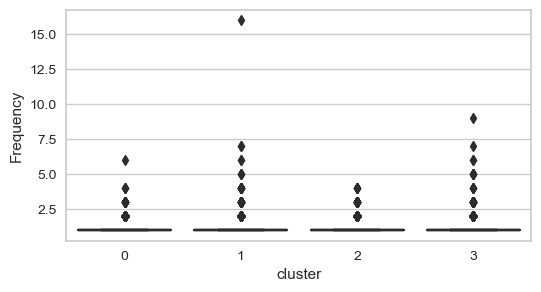

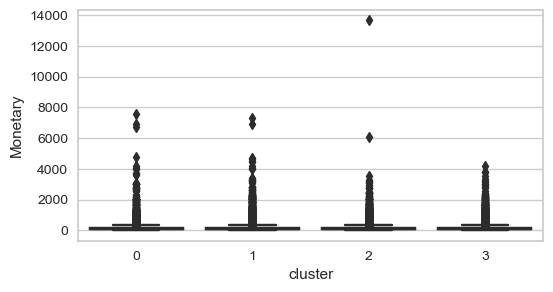

In [42]:
for i,c in enumerate(list(result_df.columns[1:4])):
    plt.figure(figsize = (6,3))
    sns.boxplot(y = result_df[c], x = result_df['cluster'], order = [0,1,2,3], palette='Greens')
    plt.show()

### 클러스터별 통계량을 이용하여 R,F,M 가중치 계산
- 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV(변동계수)를 구한 뒤 CV를 최소로하는 계수들을 CV의 합으로 다시 나누어 최종 가중치 결정

In [43]:
tmp = result_df.pivot_table(index = 'cluster', values=['Recency', 'Frequency', 'Monetary'], aggfunc=['mean', 'std'])
tmp

mean                               std                       
        Frequency    Monetary     Recency Frequency    Monetary    Recency
cluster                                                                   
0        1.025421  164.356140  490.575584  0.171774  242.839770  59.045839
1        1.039170  169.651038   68.384464  0.244337  237.535599  36.104531
2        1.032344  166.355502  320.523692  0.190134  230.106414  43.422180
3        1.035449  162.205922  190.035340  0.216106  201.615990  35.132385

In [44]:
# Recency = w1
cv_r_0 = tmp[('std', 'Recency')][0] / tmp[('mean', 'Recency')][0]
cv_r_1 = tmp[('std', 'Recency')][1] / tmp[('mean', 'Recency')][1]
cv_r_2 = tmp[('std', 'Recency')][2] / tmp[('mean', 'Recency')][2]
cv_r_3 = tmp[('std', 'Recency')][3] / tmp[('mean', 'Recency')][3]

w_r = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
w_r

0.12425321110457906

In [45]:
# Frequency = w2
cv_f_0 = tmp[('std', 'Frequency')][0] / tmp[('mean', 'Frequency')][0]
cv_f_1 = tmp[('std', 'Frequency')][1] / tmp[('mean', 'Frequency')][1]
cv_f_2 = tmp[('std', 'Frequency')][2] / tmp[('mean', 'Frequency')][2]
cv_f_3 = tmp[('std', 'Frequency')][3] / tmp[('mean', 'Frequency')][3]

w_f = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
w_f

0.21057171883581247

In [46]:
# Monetary = w3
cv_m_0 = tmp[('std', 'Monetary')][0] / tmp[('mean', 'Monetary')][0]
cv_m_1 = tmp[('std', 'Monetary')][1] / tmp[('mean', 'Monetary')][1]
cv_m_2 = tmp[('std', 'Monetary')][2] / tmp[('mean', 'Monetary')][2]
cv_m_3 = tmp[('std', 'Monetary')][3] / tmp[('mean', 'Monetary')][3]

w_m = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
w_m

0.2258352956827614

In [47]:
# 모든 가중치의 합을 1로 만들도록 변환하여 최종적으로 각 R, F, M에 대한 가중치 계산
W_R = w_r / (w_r + w_f + w_m)
W_F = w_f / (w_r + w_f + w_m)
W_M = w_m / (w_r + w_f + w_m)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.22161945047283538
Weight of Frequency: 0.37557812952001335
Weight of Monetary : 0.40280242000715116
Total sum of weight: 0.9999999999999999


In [48]:
result_df['RFM_score'] = (result_df['R_score'].astype('int64') * W_R / 5 * 100 + result_df['F_score'].astype('int64') * W_F / 3 * 100 + result_df['M_score'].astype('int64') * W_M / 5 * 100)
result_df

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,cluster,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,4,1,4,1,62.473021
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,4,1,1,1,38.304875
2,0000f46a3911fa3c0805444483337064,543,1,86.22,1,1,2,0,33.063757
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,2,1,1,2,29.440097
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2,1,4,2,53.608243
...,...,...,...,...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,453,1,2067.42,1,1,5,0,57.231902
94985,fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58,3,1,2,2,41.928535
94986,ffff371b4d645b6ecea244b27531430a,574,1,112.46,1,1,3,0,41.119805
94987,ffff5962728ec6157033ef9805bacc48,125,1,133.69,4,1,4,1,62.473021


In [49]:
result_df.RFM_score.describe()

count    94989.000000
mean        50.408844
std         13.670382
min         25.007708
25%         41.119805
50%         49.984583
75%         61.664291
max        100.000000
Name: RFM_score, dtype: float64

In [50]:
RFM_score = pd.qcut(result_df['RFM_score'].values, 4)
RFM_score.describe()

,counts,freqs
categories,,
"(25.006999999999998, 41.12]",26889,0.283075
"(41.12, 49.985]",21756,0.229037
"(49.985, 61.664]",25808,0.271695
"(61.664, 100.0]",20536,0.216193


In [51]:
result_df['class'] = pd.qcut(result_df['RFM_score'], 4, labels = ['Bronze', 'Silver', 'Gold', 'Diamond'])
result_df.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,cluster,RFM_score,class
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,4,1,4,1,62.473021,Diamond
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,4,1,1,1,38.304875,Bronze
2,0000f46a3911fa3c0805444483337064,543,1,86.22,1,1,2,0,33.063757,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,2,1,1,2,29.440097,Bronze
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2,1,4,2,53.608243,Gold
5,0004bd2a26a76fe21f786e4fbd80607f,152,1,166.98,4,1,4,3,62.473021,Diamond
6,00050ab1314c0e55a6ca13cf7181fecf,137,1,35.38,4,1,1,3,38.304875,Bronze
7,00053a61a98854899e70ed204dd4bafe,188,1,419.18,3,1,5,3,66.096680,Diamond
8,0005e1862207bf6ccc02e4228effd9a0,549,1,150.12,1,1,4,0,49.175854,Silver
9,0005ef4cd20d2893f0d9fbd94d3c0d97,176,1,129.76,4,1,3,3,54.416972,Gold


In [52]:
class_count = result_df['class'].value_counts()
class_count

class
Bronze     26889
Gold       25808
Silver     21756
Diamond    20536
Name: count, dtype: int64

In [53]:
# !pip install squarify
import squarify

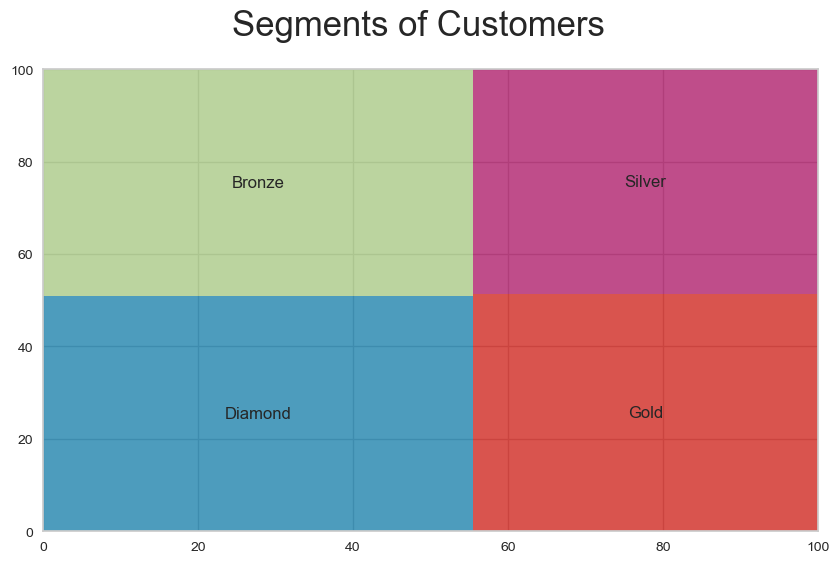

In [54]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=class_count, label=result_df['class'].unique(), color=["b","g","r","m"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)
plt.show()

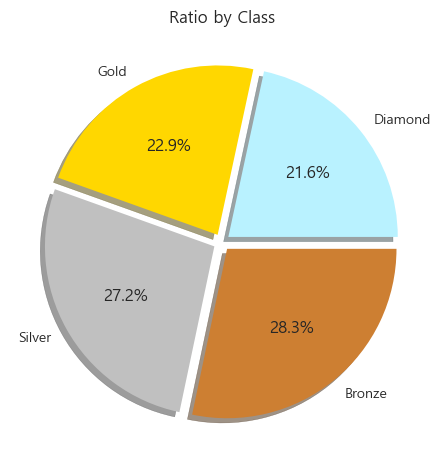

In [62]:
labels = ['Bronze', 'Silver', 'Gold', 'Diamond']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#CD7F32','silver', 'gold', '#b9f2ff']

plt.pie(result_df['class'].value_counts(), labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, explode=explode, shadow=True)
plt.title('Ratio by Class')
plt.show()

In [59]:
result_df.groupby('class')[['Recency','Frequency','Monetary']].agg(['mean','median', 'min', 'max'])

Recency                  Frequency                   Monetary  \
               mean median  min  max      mean median min max        mean   
class                                                                       
Bronze   351.933318  356.0  100  701  1.000260    1.0   1   2   58.556304   
Silver   237.911840  225.0    6  730  1.001931    1.0   1   2   92.318629   
Gold     226.555990  222.0    6  700  1.010578    1.0   1   4  212.751560   
Diamond  133.099435  125.0    2  698  1.140972    1.0   1  16  324.573442   

                                   
          median    min       max  
class                              
Bronze    52.000  10.07    133.05  
Silver    86.730   9.59    209.12  
Gold     144.125  35.94  13664.08  
Diamond  227.235  56.46   7571.63

In [60]:
result_df.groupby('class')['Monetary'].sum().sort_values() / result_df['Monetary'].sum()*100

class
Bronze     10.003855
Silver     12.761081
Gold       34.885599
Diamond    42.349464
Name: Monetary, dtype: float64

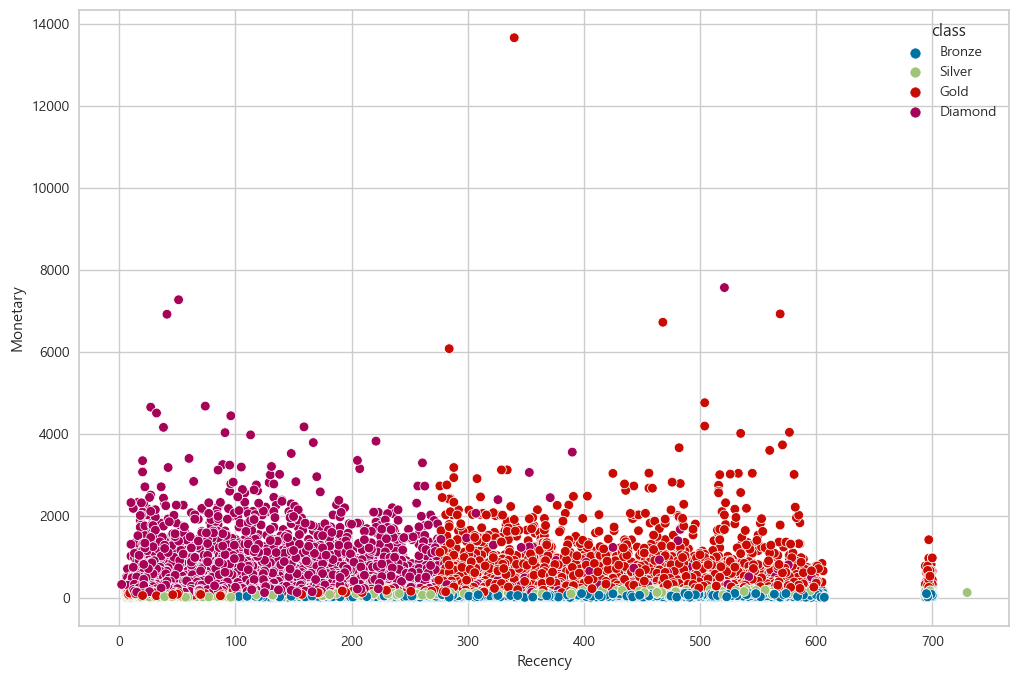

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Recency', y='Monetary', data=result_df, hue='class')
plt.show();